In [1]:
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy,4mr,fu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power%20Banks'

In [3]:
url2 = 'https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=2'

In [4]:
for i in range(1,26):
    url=f'https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page={i}'
    print(url)

https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=1
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=2
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=3
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=4
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=5
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=6
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otr

In [5]:
brand=[]
capacity=[]
power=[]
price=[]
color=[]
battery_type=[]
ratings=[]

for i in range(1,26):
    url=f'https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page={i}'
    print(url)
    
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    data = soup.find_all('a',class_='s1Q9rs')
    for i in data:
        regex = re.findall('^\w+',i.text)
        if regex:
            brand.append(regex[0])
        else:
            brand.append(np.nan)
        
    #cpacity    
        
        reg = re.findall('\s(\d+)\smAh',i.text)
        if reg:
            capacity.append(reg[0])
        else:
            capacity.append(np.nan)
            
        #Power
        reg = re.findall('mAh\s(\d+.?\d+)',i.text)   
        if reg:
            power.append(reg[0])
        else:
            power.append(np.nan)
        
    
    data2 = soup.find_all('div',class_='_4ddWXP')
    for i in data2:
        
        #Price
        reg = re.findall('₹(.*)₹',i.text)
        if reg:
            price.append(reg[0])
        else:
            price.append(np.nan)
            
        
        #color
        rx = re.findall('Power\s(\w+),',i.text)
        if rx:
            color.append(rx[0])
        else:
            color.append(np.nan)
            
            
        #battery_type
        
        rex = re.findall('Lithium-\w+|Lithium\sPolymer',i.text)
        if rex:
            battery_type.append(rex[0])
        else:
            battery_type.append(np.nan)
            
    data3 = soup.find_all('div',class_="_4ddWXP")
    for i in data3:
        try:
            ratings.append(i.find('div',class_='_3LWZlK').text)
        except:
            ratings.append(np.nan)
            


https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=1
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=2
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=3
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=4
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=5
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otracker=categorytree&otracker=nmenu_sub_Electronics_0_Power+Banks&page=6
https://www.flipkart.com/mobile-accessories/power-banks/pr?sid=tyy%2C4mr%2Cfu6&otr

In [6]:
len(brand)

1000

In [7]:
len(power)

1000

In [8]:
#price
len(brand)

1000

In [9]:
len(capacity)

1000

In [8]:
df = pd.DataFrame({"Brand":brand,"Capacity":capacity,"Power":power,"Price":price,"Color":color,"Battery_Type":battery_type,"Ratings":ratings})

In [9]:
df['Price'] =  df['Price'].str.replace(",","")

In [10]:
df

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Mi,10000,18,1249,BankBlue,Lithium Polymer,4.3
1,URBN,10000,12,899,NaN,Lithium Polymer,4
2,Mi,20000,18,1899,BankBlack,Lithium Polymer,4.3
3,boAt,20000,22.5,1499,BankBurgundy,Lithium Polymer,4.1
4,boAt,20000,22.5,1499,NaN,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
995,misspro,10000,12,569,BankYellow,Lithium-ion,NaN
996,URBN,20000,22.5,1799,BankBlue,Lithium Polymer,4.5
997,REDMI,10000,10,1099,BankBlack,Lithium Polymer,4.2
998,reditor,30000,15,599,BankWhite,Lithium-ion,NaN


In [11]:
df.to_csv("PowerBank.csv")

In [12]:
df1 = pd.read_csv("PowerBank.csv")

In [13]:
import os

In [14]:
os.getcwd()

'C:\\Users\\rahul\\RR\\Project EDA'

In [15]:
df1.drop('Unnamed: 0',axis = 1,inplace = True)

In [45]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Mi,10000.0,18.0,1249.0,BankBlue,Lithium Polymer,4.3
1,URBN,10000.0,12.0,899.0,NaN,Lithium Polymer,4.0
2,Mi,20000.0,18.0,1899.0,BankBlack,Lithium Polymer,4.3
3,boAt,20000.0,22.5,1499.0,BankBurgundy,Lithium Polymer,4.1
4,boAt,20000.0,22.5,1499.0,NaN,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
995,misspro,10000.0,12.0,569.0,BankYellow,Lithium-ion,NaN
996,URBN,20000.0,22.5,1799.0,BankBlue,Lithium Polymer,4.5
997,REDMI,10000.0,10.0,1099.0,BankBlack,Lithium Polymer,4.2
998,reditor,30000.0,15.0,599.0,BankWhite,Lithium-ion,NaN


# Data Cleaning

## Type Casting

In [26]:
df1.dtypes

Brand            object
Capacity        float64
Power           float64
Price           float64
Color            object
Battery_Type     object
Ratings         float64
dtype: object

In [22]:
df1['Power'].unique()

array([ 18. ,  12. ,  22.5,  25. ,  20. ,  23. ,  10. ,  33. ,  15. ,
        22. ,  10.5,   nan,  65. ,  30. ,  14. ,  11. , 100. , 120. ,
        13. ,  12.5,  74. ,  33.5,  20.5,  85. ,   2.5])

In [27]:
df1['Power'] = df1['Power'].astype('float64')

In [32]:
df1['Capacity'] = df1['Capacity'].astype('float64')

In [33]:
df1.dtypes

Brand            object
Capacity        float64
Power           float64
Price           float64
Color            object
Battery_Type     object
Ratings         float64
dtype: object

## Missing values

In [34]:
df1.isna().sum()

Brand             0
Capacity          3
Power           137
Price             5
Color           199
Battery_Type      4
Ratings         379
dtype: int64

In [35]:
df1['Capacity'].isna().sum()

3

In [38]:
df1['Capacity']

0      10000.0
1      10000.0
2      20000.0
3      20000.0
4      20000.0
        ...   
995    10000.0
996    20000.0
997    10000.0
998    30000.0
999    45600.0
Name: Capacity, Length: 1000, dtype: float64

In [39]:
df1['Capacity'].mean()

19149.96990972919

In [40]:
df1['Capacity'].fillna(df1['Capacity'].mean(),inplace=True)

In [42]:
df1['Capacity'].isna().sum()

0

In [44]:
df1['Power'].isna().sum()

137

In [47]:
df1['Power'].mean()

18.23870220162225

In [48]:
df1['Power'].fillna(df1['Power'].mean(),inplace=True)

In [49]:
df1['Power'].isna().sum()

0

In [50]:
df1['Price'].isna().sum()

5

In [52]:
df1['Price'].mean()

1360.8522613065327

In [53]:
df1['Price'].fillna(df1['Price'].mean(),inplace=True)

In [54]:
df1['Price'].isna().sum()

0

In [55]:
df1['Color'].isna().sum()

199

In [56]:
df1['Color'].mode()

0    BankBlack
Name: Color, dtype: object

In [57]:
df1['Color'].fillna(df1['Color'].mode()[0],inplace=True)

In [58]:
df1['Color'].isna().sum()

0

In [59]:
df1['Battery_Type'].isna().sum()

4

In [60]:
df1['Battery_Type'].mode()

0    Lithium Polymer
Name: Battery_Type, dtype: object

In [61]:
df1['Battery_Type'].fillna(df1['Battery_Type'].mode()[0],inplace=True)

In [62]:
df1['Battery_Type'].isna().sum()

0

In [63]:
df1['Ratings'].isna().sum()

379

In [64]:
df1['Ratings'].median()

4.0

In [65]:
df1['Ratings'].fillna(df1['Ratings'].median(),inplace=True)

In [66]:
df1['Ratings'].isna().sum()

0

In [70]:
df1.isna().sum()

Brand           0
Capacity        0
Power           0
Price           0
Color           0
Battery_Type    0
Ratings         0
dtype: int64

In [71]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
995,misspro,10000.0,12.000000,569.0,BankYellow,Lithium-ion,4.0
996,URBN,20000.0,22.500000,1799.0,BankBlue,Lithium Polymer,4.5
997,REDMI,10000.0,10.000000,1099.0,BankBlack,Lithium Polymer,4.2
998,reditor,30000.0,15.000000,599.0,BankWhite,Lithium-ion,4.0


## Duplicated values

In [72]:
df1.duplicated().sum()

509

In [73]:
df1.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [74]:
df1.duplicated().sum()

0

In [75]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
486,zofia,30000.0,18.000000,599.0,BankBlue,Lithium-ion,4.0
487,Portronics,10000.0,22.500000,1449.0,BankWhite,Lithium-ion,4.1
488,ORENICS,33000.0,18.238702,449.0,BankGreen,Lithium-ion,3.2
489,DG,20000.0,18.000000,959.0,BankWhite,Lithium Polymer,4.0


In [94]:
#df1['Ratings'] = df1['Ratings'].fillna(df1.groupby("Brand")['Ratings'].transform(lambda x: x.fillna(x.mode())))

## Outliers

<Axes: >

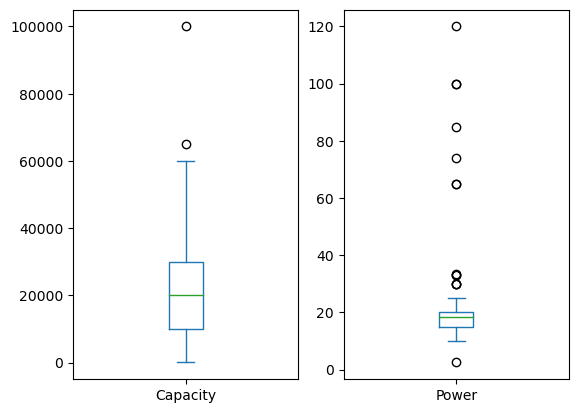

In [76]:
plt.subplot(1, 2, 1)
df1['Capacity'].plot(kind = 'box')

plt.subplot(1, 2, 2)
df1['Power'].plot(kind = 'box')

<Axes: >

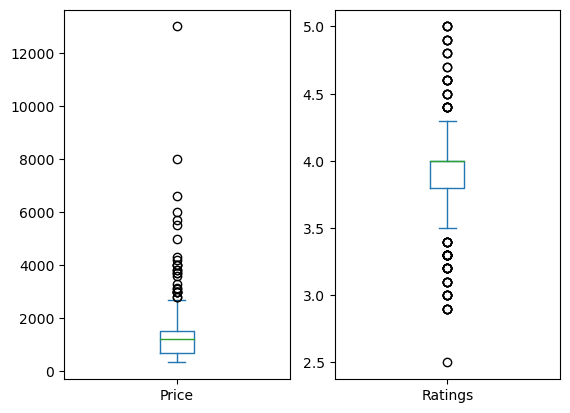

In [77]:
plt.subplot(1, 2, 1)
df1['Price'].plot(kind = 'box')

plt.subplot(1, 2, 2)
df1['Ratings'].plot(kind = 'box')

## Noisy Data

In [78]:
df1.columns

Index(['Brand', 'Capacity', 'Power', 'Price', 'Color', 'Battery_Type',
       'Ratings'],
      dtype='object')

In [79]:
df1['Brand'].unique()

array(['Mi', 'URBN', 'boAt', 'ORAIMO', 'SAMSUNG', 'Ambrane', 'Lifelong',
       'WINgFI', 'DURACELL', 'Callmate', 'REDMI', 'DR', 'realme', 'Intex',
       'Flipkart', 'Spigen', 'ZEBRONICS', 'PTron', 'Ipro', 'Rock', 'FliX',
       'Portronics', 'Belkin', 'Syska', 'PHILIPS', 'uomi', 'Anker',
       'PunnkFunnk', 'Iqoniqe', 'UnV', 'sykz', 'Binori', 'BELKIN',
       'AMYTEL', 'MI', 'Qubo', 'STUFFCOOL', 'URBAN', 'MIMO', 'reditor',
       'misspro', 'zofia', 'Cellecor', 'GUG', 'Ultraprolink', 'MIOX',
       'delphine', 'Unix', 'ELIIDE', 'senerathe', 'X88', 'True',
       'ORENICS', 'DG', 'BELL', 'conekt', 'RPMSD', 'WebMedia', 'SKYWATER',
       'FIGER', 'akvaari', 'powerup', 'PHONOKART', 'Toreto', 'Vwalk',
       'Muvit', 'ERD', 'Tekk', 'MEGABAR', 'itel', 'AXL', 'vismac',
       'Rasta', 'Videocon', 'Hamine', 'Runixx', 'Maxclass', 'Gizmore',
       'Obin', 'MAK', 'Frontech', 'MARS', 'Freak', '9Ways', 'DUDAO',
       'FluSun', 'ModishOmbre', 'Apple', 'HOBINS', 'slainte', 'RR',
       'Enter',

In [80]:
df1['Capacity'].unique()

array([1.00000000e+04, 2.00000000e+04, 2.70000000e+04, 6.00000000e+04,
       3.00000000e+04, 2.08000000e+04, 1.30000000e+04, 1.91499699e+04,
       5.00000000e+04, 6.50000000e+04, 4.20000000e+04, 2.60000000e+03,
       3.50000000e+04, 5.00000000e+03, 3.20000000e+04, 4.50000000e+04,
       4.10000000e+04, 2.25000000e+04, 2.50000000e+04, 4.00000000e+04,
       3.30000000e+04, 5.50000000e+04, 1.00000000e+05, 7.20000000e+03,
       2.40000000e+04, 7.80000000e+03, 3.25000000e+04, 4.24000000e+04,
       2.68000000e+04, 1.50000000e+04, 4.80000000e+04, 4.63000000e+04,
       4.43000000e+04, 5.47000000e+04, 2.42000000e+04, 3.75000000e+04,
       4.83000000e+04, 4.33000000e+04, 5.40000000e+04, 1.85000000e+04,
       2.24000000e+04, 2.54000000e+04, 4.70000000e+04, 3.47000000e+04,
       2.03000000e+04, 4.90000000e+04, 3.83000000e+04, 2.58000000e+04,
       4.28000000e+04, 4.60000000e+04, 4.64000000e+04, 2.20000000e+04,
       2.46000000e+04, 5.21000000e+04, 5.37000000e+04, 2.90000000e+04,
      

In [81]:
df1['Power'].unique()

array([ 18.       ,  12.       ,  22.5      ,  25.       ,  20.       ,
        23.       ,  10.       ,  33.       ,  15.       ,  22.       ,
        10.5      ,  18.2387022,  65.       ,  30.       ,  14.       ,
        11.       , 100.       , 120.       ,  13.       ,  12.5      ,
        74.       ,  33.5      ,  20.5      ,  85.       ,   2.5      ])

In [82]:
df1['Price'].unique()

array([ 1249.        ,   899.        ,  1899.        ,  1499.        ,
         599.        ,  1999.        ,  2299.        ,  1799.        ,
         699.        ,  1599.        ,   799.        ,  1199.        ,
        1299.        ,   999.        ,  3099.        ,  3599.        ,
        1099.        ,  1329.        ,  2999.        ,  2499.        ,
        3299.        ,  1175.        ,  1360.85226131,  1026.        ,
         655.        ,  1849.        ,   849.        ,  2196.        ,
        1349.        ,  4299.        ,   729.        ,  2149.        ,
         499.        ,  2199.        ,  2599.        ,   598.        ,
         326.        ,   664.        ,  1489.        ,   539.        ,
         629.        ,   399.        ,  3999.        ,  4999.        ,
        1958.        ,   677.        ,   854.        ,   649.        ,
         658.        ,   989.        ,   569.        ,   898.        ,
         477.        ,   752.        ,   498.        ,   991.        ,
      

In [83]:
df1['Color'].unique()

array(['BankBlue', 'BankBlack', 'BankBurgundy', 'BankBeige', 'BankCamo',
       'BankWhite', 'BankMulticolor', 'BankTransparent', 'BankYellow',
       'BankGreen', 'BankRed', 'BankMaroon', 'BankPurple', 'BankOrange',
       'BankGrey', 'BankPink', 'Bank', 'bank', 'BankBrown',
       'BankASSORTED', 'BankSilver', 'Bankback'], dtype=object)

In [84]:
df1['Battery_Type'].unique()

array(['Lithium Polymer', 'Lithium-ion'], dtype=object)

In [85]:
df1['Ratings'].unique()

array([4.3, 4. , 4.1, 4.2, 4.5, 3.6, 3.8, 4.4, 4.9, 3.7, 4.6, 3.9, 3.3,
       4.7, 3.2, 4.8, 3.5, 3. , 3.4, 3.1, 5. , 2.9, 2.5])

In [86]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
486,zofia,30000.0,18.000000,599.0,BankBlue,Lithium-ion,4.0
487,Portronics,10000.0,22.500000,1449.0,BankWhite,Lithium-ion,4.1
488,ORENICS,33000.0,18.238702,449.0,BankGreen,Lithium-ion,3.2
489,DG,20000.0,18.000000,959.0,BankWhite,Lithium Polymer,4.0


## Data Visualization

## UNI-Variate

In [87]:
import matplotlib.pyplot as plt

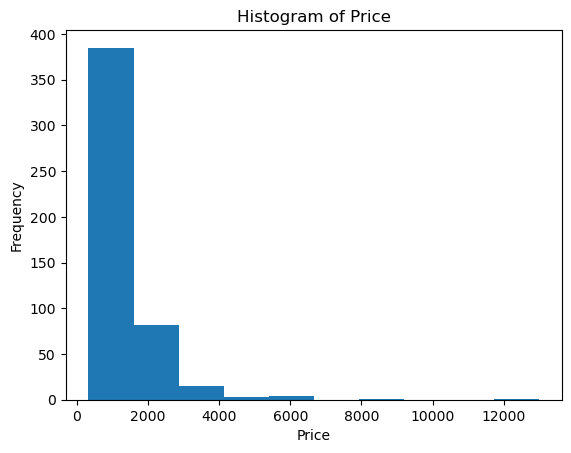

In [96]:
#plt.figure(figsize = (4,3))
plt.hist(df1['Price'],bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [97]:
#plt.figure(figsize = (4,3))
#plt.hist(df1['Ratings'])
#plt.xlabel('Ratings')
#plt.ylabel('Frequency')
#plt.title('Histogram of Ratings')
#plt.show()

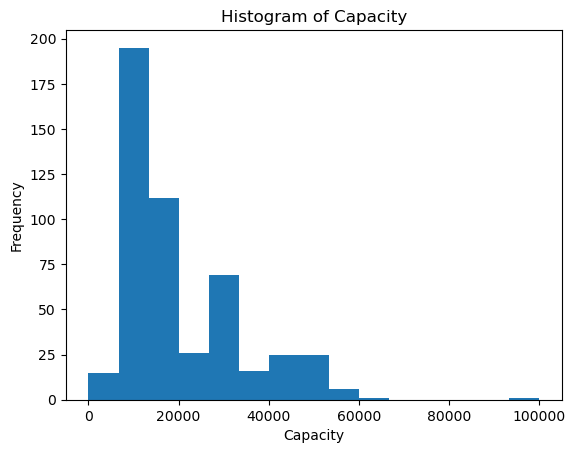

In [99]:
#plt.figure(figsize = (4,3))
plt.hist(df1['Capacity'],bins=15)
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.title('Histogram of Capacity')
plt.show()

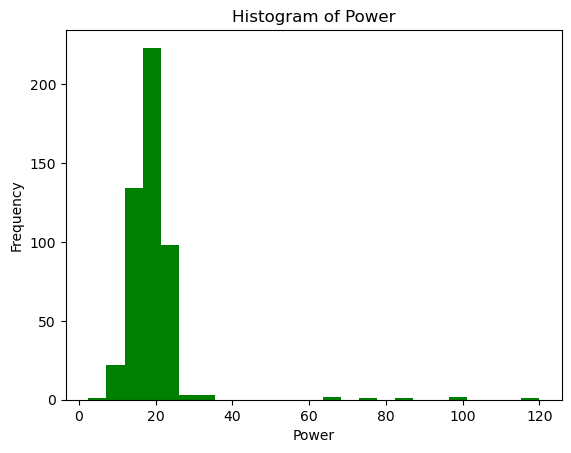

In [102]:
#plt.figure(figsize = (4,3))
plt.hist(df1['Power'],bins=25,color="green")
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Histogram of Power')
plt.show()

In [222]:
import seaborn as sns

## Bar Plot

In [110]:
df1['Brand'].nunique()

93

<Axes: xlabel='Brand'>

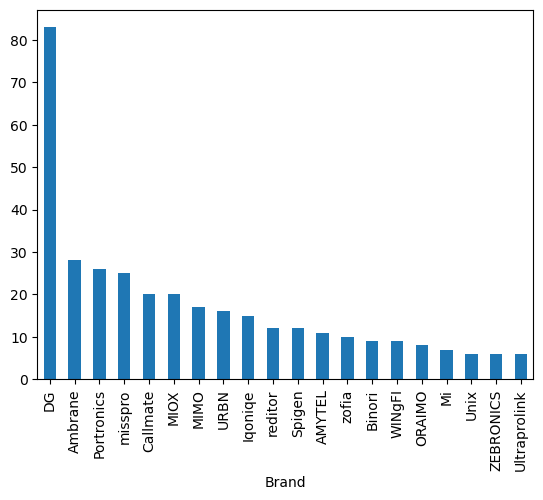

In [105]:
df1['Brand'].value_counts().head(20).plot(kind='bar')

## pie Chart

In [106]:
#plt.pie(df1['Brand'].value_counts(),labels = df1['Brand'].unique(),autopct = '%.2f')
plt.show()

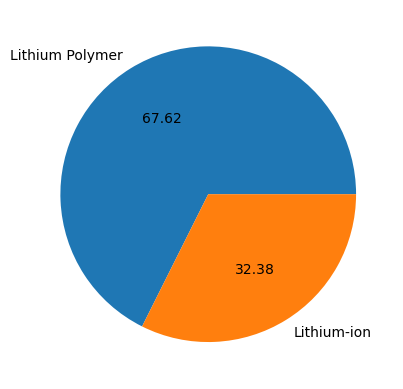

In [115]:
plt.pie(df1['Battery_Type'].value_counts(),labels = df1['Battery_Type'].unique(),autopct = '%.2f')
plt.show()

# Bi-Variate

## Scatter Plot

<Axes: xlabel='Capacity', ylabel='Price'>

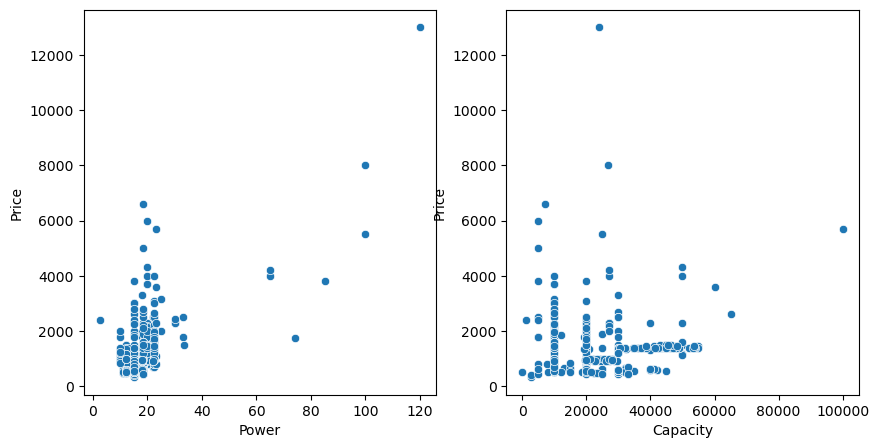

In [116]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df1,x = 'Power',y = 'Price')
plt.subplot(1,2,2)
sns.scatterplot(data = df1,x = 'Capacity',y = 'Price')

<Axes: xlabel='Ratings', ylabel='Price'>

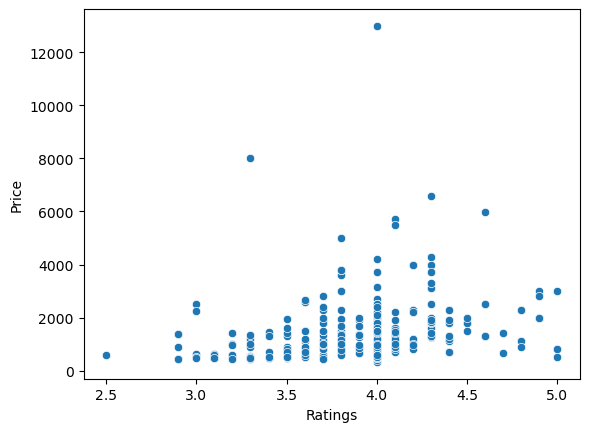

In [117]:
sns.scatterplot(data = df1,x = 'Ratings',y = 'Price')

## Bar Chart

In [124]:
df1['Category']= np.nan

In [125]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings,Category
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3,NaN
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0,NaN
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3,NaN
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1,NaN
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1,NaN
...,...,...,...,...,...,...,...,...
486,zofia,30000.0,18.000000,599.0,BankBlue,Lithium-ion,4.0,NaN
487,Portronics,10000.0,22.500000,1449.0,BankWhite,Lithium-ion,4.1,NaN
488,ORENICS,33000.0,18.238702,449.0,BankGreen,Lithium-ion,3.2,NaN
489,DG,20000.0,18.000000,959.0,BankWhite,Lithium Polymer,4.0,NaN


In [122]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings,Category
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3,NaN
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0,NaN
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3,NaN
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1,NaN
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1,NaN
...,...,...,...,...,...,...,...,...
486,zofia,30000.0,18.000000,599.0,BankBlue,Lithium-ion,4.0,NaN
487,Portronics,10000.0,22.500000,1449.0,BankWhite,Lithium-ion,4.1,NaN
488,ORENICS,33000.0,18.238702,449.0,BankGreen,Lithium-ion,3.2,NaN
489,DG,20000.0,18.000000,959.0,BankWhite,Lithium Polymer,4.0,NaN


In [126]:
df1[df1['Category']=="Low Rated"]

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings,Category


In [127]:
for i in range(len(df1['Ratings'])):
    if df1['Ratings'][i] >=4:
        df1['Category'][i] = "Highly Rated"
    elif df1['Ratings'][i] >=3 and df1['Ratings'][i]<4:
        df1['Category'][i] = "Average Rated"
    else:
        df1['Category'][i] = "Low Rated"
    

C:\Users\rahul\AppData\Local\Temp\ipykernel_8100\1619529609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'][i] = "Highly Rated"


C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


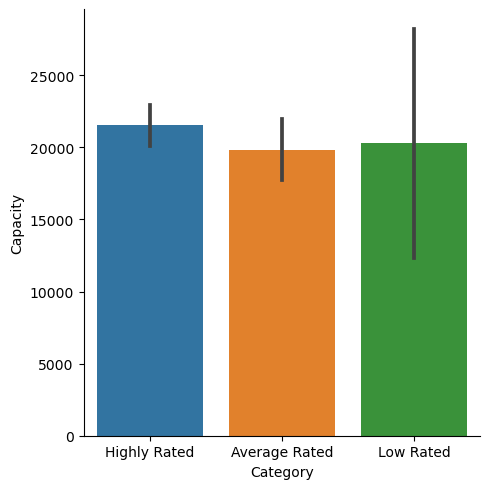

In [128]:
sns.catplot(data = df1,x = 'Category',y = 'Capacity',kind = 'bar') 

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


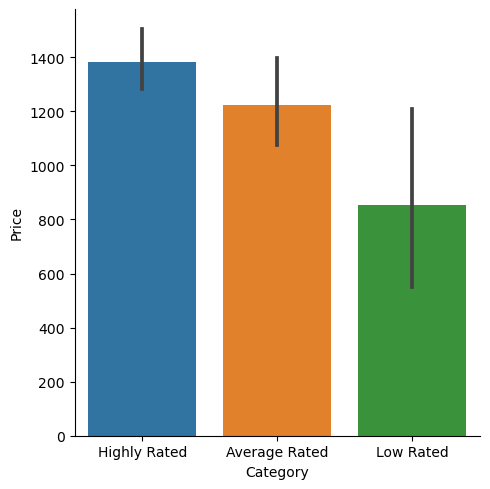

In [129]:
sns.catplot(data = df1,x = 'Category',y = 'Price',kind = 'bar')

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


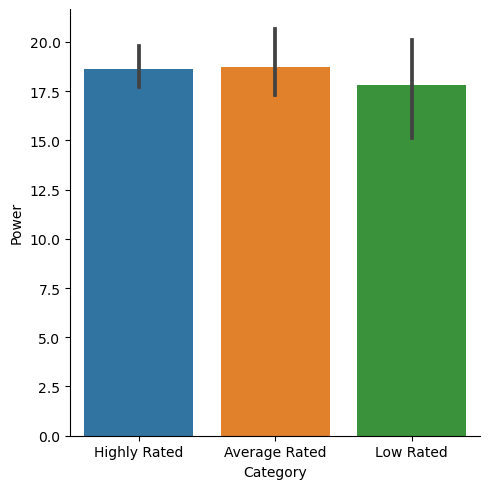

In [130]:
sns.catplot(data = df1,x = 'Category',y = 'Power',kind = 'bar')

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


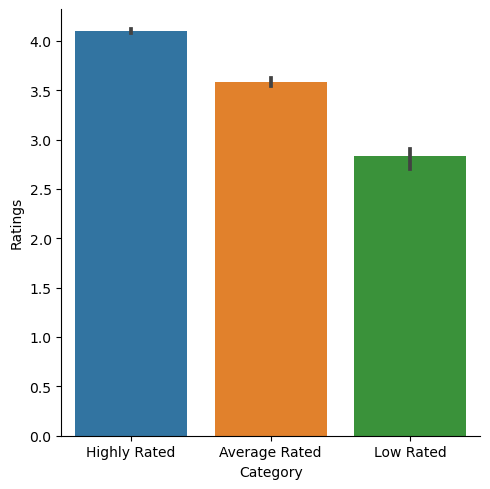

In [131]:
sns.catplot(data = df1,x = 'Category',y = 'Ratings',kind = 'bar')

## Cross Tab

In [132]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings,Category
0,Mi,10000.0,18.000000,1249.0,BankBlue,Lithium Polymer,4.3,Highly Rated
1,URBN,10000.0,12.000000,899.0,BankBlack,Lithium Polymer,4.0,Highly Rated
2,Mi,20000.0,18.000000,1899.0,BankBlack,Lithium Polymer,4.3,Highly Rated
3,boAt,20000.0,22.500000,1499.0,BankBurgundy,Lithium Polymer,4.1,Highly Rated
4,boAt,20000.0,22.500000,1499.0,BankBlack,Lithium Polymer,4.1,Highly Rated
...,...,...,...,...,...,...,...,...
486,zofia,30000.0,18.000000,599.0,BankBlue,Lithium-ion,4.0,Highly Rated
487,Portronics,10000.0,22.500000,1449.0,BankWhite,Lithium-ion,4.1,Highly Rated
488,ORENICS,33000.0,18.238702,449.0,BankGreen,Lithium-ion,3.2,Average Rated
489,DG,20000.0,18.000000,959.0,BankWhite,Lithium Polymer,4.0,Highly Rated


In [133]:
pd.crosstab(df1['Brand'],df1['Battery_Type'])

Battery_Type,Lithium Polymer,Lithium-ion
Brand,,
9Ways,1,0
AMYTEL,10,1
AXL,1,0
Ambrane,26,2
Anker,1,0
...,...,...
slainte,1,0
sykz,3,2
uomi,0,1


In [134]:
pd.crosstab(df1['Brand'],df1['Color'])

Color,Bank,BankASSORTED,BankBeige,BankBlack,BankBlue,BankBrown,BankBurgundy,BankCamo,BankGreen,BankGrey,...,BankOrange,BankPink,BankPurple,BankRed,BankSilver,BankTransparent,BankWhite,BankYellow,Bankback,bank
Brand,,,,,,,,,,,,,,,,,,,,,
9Ways,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMYTEL,0,0,0,6,0,0,0,0,0,0,...,0,0,0,3,0,0,2,0,0,0
AXL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ambrane,0,0,0,13,6,0,0,0,5,0,...,1,0,2,0,0,0,0,0,0,0
Anker,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
slainte,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sykz,0,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
uomi,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
pd.crosstab(df1['Brand'],df1['Category'])

Category,Average Rated,Highly Rated,Low Rated
Brand,,,
9Ways,0,1,0
AMYTEL,4,6,1
AXL,0,1,0
Ambrane,2,26,0
Anker,0,1,0
...,...,...,...
slainte,1,0,0
sykz,2,2,1
uomi,1,0,0


## Multi-Variate

## Heat Map

In [136]:
df1['Ratings'].nunique()

23

In [137]:
df1.corr(numeric_only = True)

,Capacity,Power,Price,Ratings
Capacity,1.000000,0.061697,0.099371,-0.130599
Power,0.061697,1.000000,0.656658,0.039544
Price,0.099371,0.656658,1.000000,0.201882
Ratings,-0.130599,0.039544,0.201882,1.000000


<Axes: >

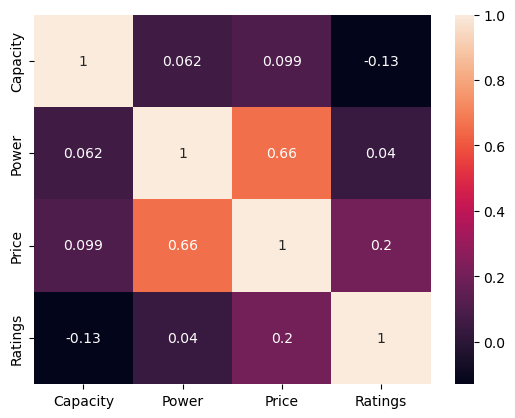

In [138]:
sns.heatmap(df1.corr(numeric_only = True),annot=True)

## Pair Plot

In [113]:
#sns.pairplot(df1,hue = 'Category',corner = True,palette = 'rocket')

In [433]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,Ambrane,10000,20,699.0,BankGreen,Lithium Polymer,4.1
1,ORAIMO,20000,12,999.0,BankBlack,Lithium Polymer,4.1
2,Mi,20000,18,1999.0,BankBlack,Lithium Polymer,4.3
3,Mi,10000,18,1249.0,BankBlack,Lithium Polymer,4.3
4,Ambrane,10000,20,998.0,BankBlack,Lithium Polymer,4.1
...,...,...,...,...,...,...,...
629,misspro,10000,12,599.0,BankBlack,Lithium-ion,4.1
630,DG,48300,18,1399.0,BankBlack,Lithium Polymer,4.1
631,sykz,10000,18,719.0,BankWhite,Lithium Polymer,4.1
632,DG,46300,20,1399.0,BankRed,Lithium Polymer,4.3


In [114]:
#sns.jointplot(data =df1,x = 'Capacity',y = 'Price',hue = 'Category',palette = 'tab10')

In [37]:
df1

,Unnamed: 0,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,0,ORAIMO,20000.0,12.0,999.0,BankBlack,Lithium Polymer,4.1
1,1,boAt,10000.0,22.5,1399.0,NaN,Lithium Polymer,4.1
2,2,Mi,20000.0,18.0,2145.0,BankBlack,Lithium Polymer,4.3
3,3,Mi,10000.0,18.0,1299.0,BankBlue,Lithium Polymer,4.3
4,4,Mi,10000.0,18.0,1299.0,BankBlack,Lithium Polymer,4.3
...,...,...,...,...,...,...,...,...
155,155,Callmate,5000.0,15.0,699.0,BankBlack,Lithium-ion,3.8
156,156,Callmate,10000.0,15.0,999.0,BankBlack,Lithium Polymer,NaN
157,157,URBN,27000.0,22.5,2499.0,BankBlue,Lithium Polymer,4.2
158,158,Ambrane,10000.0,22.5,1299.0,BankBlack,Lithium Polymer,4.2


In [48]:
df1.groupby('Battery_Type',dropna=False).count()

,Unnamed: 0,Brand,Capacity,Power,Price,Color,Ratings
Battery_Type,,,,,,,
Lithium Polymer,149,149,149,146,148,105,143
Lithium-ion,11,11,10,9,11,11,7


In [61]:
df1

,Brand,Capacity,Power,Price,Color,Battery_Type,Ratings
0,ORAIMO,20000.0,12.0,999.0,BankBlack,Lithium Polymer,4.1
1,boAt,10000.0,22.5,1399.0,NaN,Lithium Polymer,4.1
2,Mi,20000.0,18.0,2145.0,BankBlack,Lithium Polymer,4.3
3,Mi,10000.0,18.0,1299.0,BankBlue,Lithium Polymer,4.3
4,Mi,10000.0,18.0,1299.0,BankBlack,Lithium Polymer,4.3
...,...,...,...,...,...,...,...
155,Callmate,5000.0,15.0,699.0,BankBlack,Lithium-ion,3.8
156,Callmate,10000.0,15.0,999.0,BankBlack,Lithium Polymer,NaN
157,URBN,27000.0,22.5,2499.0,BankBlue,Lithium Polymer,4.2
158,Ambrane,10000.0,22.5,1299.0,BankBlack,Lithium Polymer,4.2


In [139]:
df1.isna().sum()

Brand           0
Capacity        0
Power           0
Price           0
Color           0
Battery_Type    0
Ratings         0
Category        0
dtype: int64